# COMP4030 - Data Science and Machine Learning

# Lab 5 Clustering Solutions


**Topics from last labs you absolutely need to be familiar with**:

- how to conduct exploratory data analysis on a given dataset
- understand basic statistical descriptors and visualising statistical relationships
- data cleaning techniques
- normalisation


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install pyclustering
!pip install yellowbrick  #this is optional

# Exercises to try out different Clustering algorithms

## Read up on the following before doing the tasks

#### Clustering
https://scikit-learn.org/stable/modules/clustering.html

### Principal Component Analysis
https://scikit-learn.org/stable/modules/decomposition.html#decompositions

### Silhouette score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Distance measures
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

**Task 1**: 
- Load the cars dataset and apply the k-means clustering algorithm. 
- Experiment with different numbers of clusters and report the silhouette score. 
- Use a scatter plot to visualise the clustering results for the different numbers of clusters.

#### More information on K-means Clustering https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [14]:
# You can use the rawautodata from last week or this is a nice dataset to learn with as well https://www.kaggle.com/datasets/uciml/autompg-dataset
cars_df = pd.read_csv("auto-mpg.csv")
cars_df.shape

(398, 9)

In [15]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [53]:
cars_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.562944,5.449239,193.156091,104.357868,2969.581218,15.557360,76.030457,1.578680
std,7.837422,1.708745,104.741068,38.414392,850.893573,2.769299,3.710803,0.804031
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,101.750000,75.250000,2220.750000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2792.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,265.750000,125.000000,3612.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
# check for missing data
missingdata = cars_df.notnull()

In [12]:
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("") 

mpg
True    398
Name: mpg, dtype: int64

cylinders
True    398
Name: cylinders, dtype: int64

displacement
True    398
Name: displacement, dtype: int64

horsepower
True    398
Name: horsepower, dtype: int64

weight
True    398
Name: weight, dtype: int64

acceleration
True    398
Name: acceleration, dtype: int64

model year
True    398
Name: model year, dtype: int64

origin
True    398
Name: origin, dtype: int64

car name
True    398
Name: car name, dtype: int64



In [17]:
# seems okay - but check to make sure
cars_df[cars_df['horsepower']=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [39]:
# okay so got to fix this
cars_df['horsepower'].replace("?",np.nan, inplace=True)

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

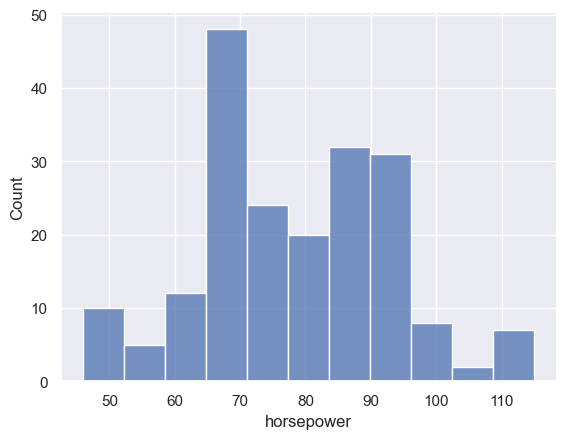

In [43]:
# Following on from lab 4 - go back and revise this if you are uncertain - 
# In order to impute - we need to check out some stats - as we don't know yet whether we could use a mean or median
# note that the horsepower would be linked to the number of cylinders rather than any of the other features
# but most of the missing values are related to cars with 4 cylinders - let's look at the stats for just those and 
# perhaps just delete the one instance with the 6 cylinders - or if you want you can repeat the same as for the 4
df_4cylinders = cars_df[cars_df['cylinders'] == 4]
# then we need to get rid of the nans and look at the distribution
hp4 = df_4cylinders['horsepower'].dropna()
sns.histplot(pd.to_numeric(hp4))  #you should have noted that horsepower was an object type

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

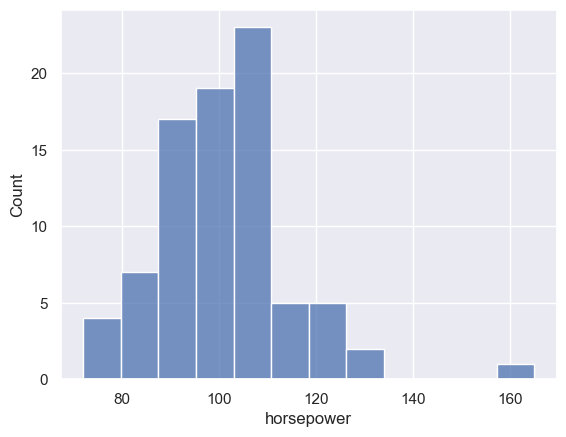

In [44]:
# lets just check for 6 cylinders as well
df_6cylinders = cars_df[cars_df['cylinders'] == 6]
# then we need to get rid of the nans and look at the distribution
hp6 = df_6cylinders['horsepower'].dropna()
sns.histplot(pd.to_numeric(hp6))  #you should have noted that horsepower was an object type

In [49]:
# so is the hp4 a normal distribution? no it is not - so better to impute using the median 
# also not that the hp6 distribution is different to hp4
cars_df = cars_df.drop(index=125)
#reset the index
cars_df = cars_df.reset_index(drop=True)
cars_df['horsepower'].fillna((cars_df['horsepower'].median()), inplace=True)
cars_df['horsepower'] = cars_df['horsepower'].astype('float')

In [ ]:
# you can also now check if the distribution has changed

In [51]:
#before you go on to do kmeans clustering explore correlations
cars_df.corr(method='kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.684436,-0.677273,-0.674024,-0.693128,0.305524,0.413533,0.465902
cylinders,-0.684436,1.000000,0.792536,0.680185,0.733421,-0.371837,-0.271973,-0.550344
displacement,-0.677273,0.792536,1.000000,0.712103,0.800290,-0.356988,-0.216633,-0.569372
horsepower,-0.674024,0.680185,0.712103,1.000000,0.696734,-0.485773,-0.275453,-0.402639
weight,-0.693128,0.733421,0.800290,0.696734,1.000000,-0.272743,-0.196832,-0.496076
acceleration,0.305524,-0.371837,-0.356988,-0.485773,-0.272743,1.000000,0.199369,0.178222
model year,0.413533,-0.271973,-0.216633,-0.275453,-0.196832,0.199369,1.000000,0.134616
origin,0.465902,-0.550344,-0.569372,-0.402639,-0.496076,0.178222,0.134616,1.000000


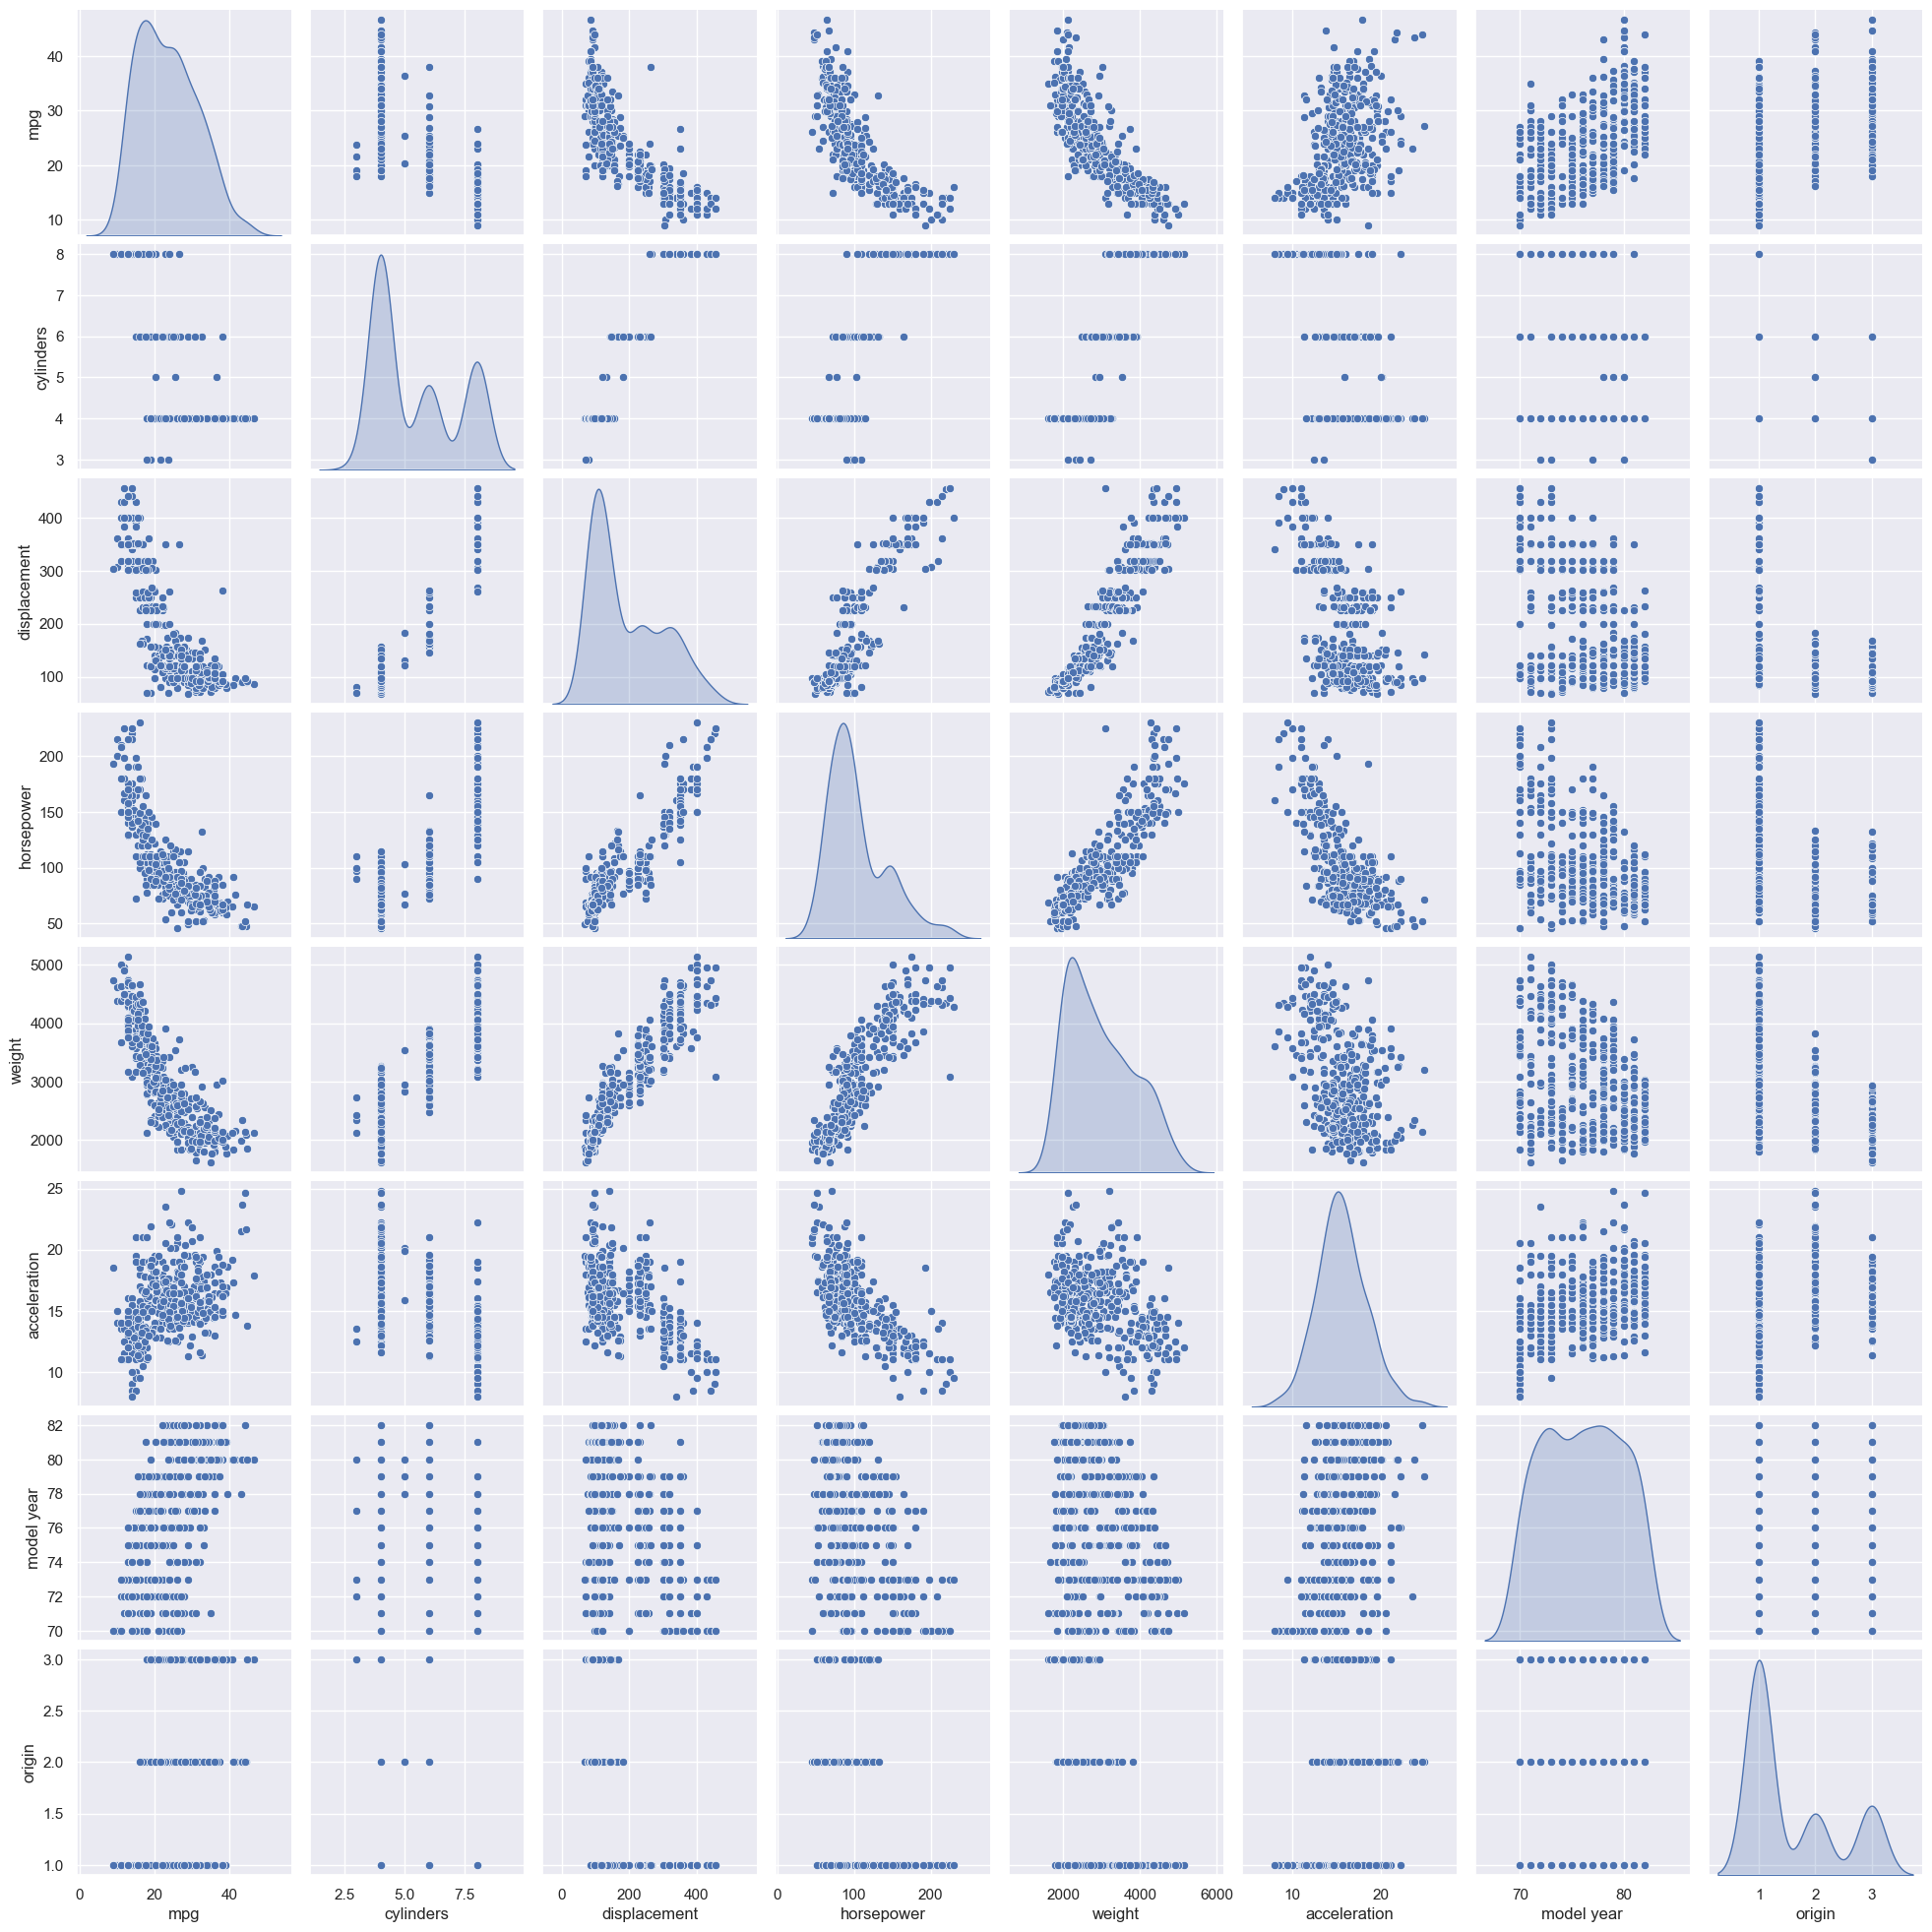

In [52]:
# and do pairwise comparisons perhaps as well
sns.pairplot(cars_df,diag_kind='kde')

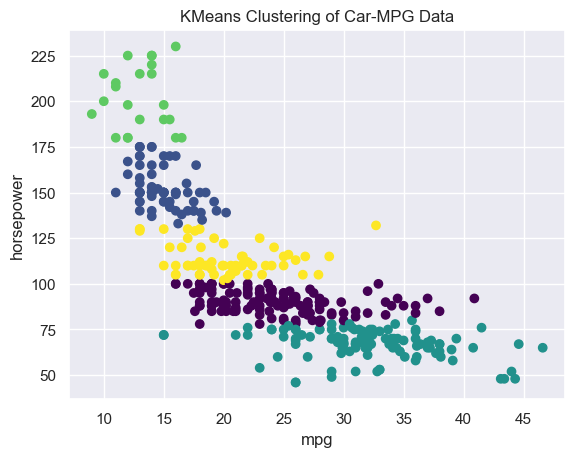

In [71]:
# based on the above there are various combinations of features you can try. You might also do PCA first. 
# how about exploring clusters by number of cylinders, using the features mpg (miles per gallon) and horsepower
from sklearn.cluster import KMeans
# Extract the relevant features (mpg, horsepower, and cylinders)
X = cars_df[['mpg', 'horsepower']].values

# Perform KMeans clustering with 5 clusters (corresponding to 5 types of cylinders?)
# NOTE this is an assumption you should really determine the number of clusters using the elbow method or statistically
kmeans = KMeans(n_clusters=5, init = 'k-means++')
kmeans.fit(X)

# Assign cluster labels to the data points
y_kmeans = kmeans.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.title('KMeans Clustering of Car-MPG Data')
plt.show()

[8 4 6 3 5]


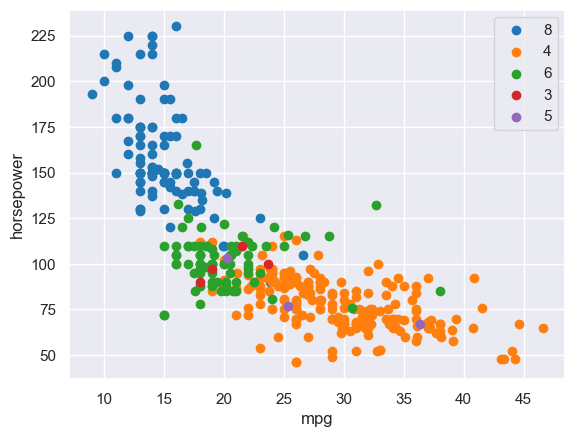

In [67]:
#label by cylinders  - also try varying the number of clusters and repeating - you might want to check how name examples of each type exist

cylinders = cars_df['cylinders'].unique()

colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, c in enumerate(cylinders):
    X_c = X[cars_df['cylinders'] == c]
    plt.scatter(X_c[:, 0], X_c[:, 1], c=colours[i], label=c, cmap='viridis')
    
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.legend()
plt.show()

<AxesSubplot:xlabel='cylinders', ylabel='Count'>

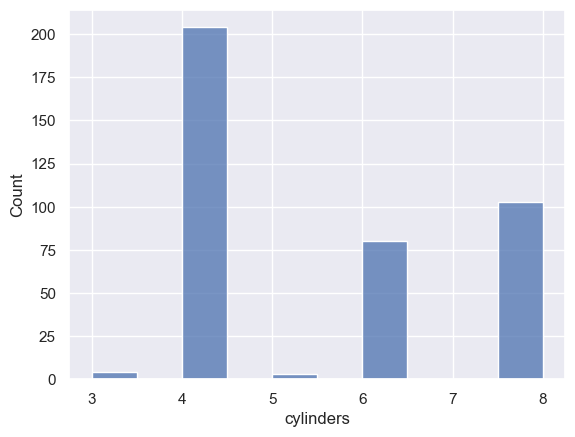

In [68]:
sns.histplot(cars_df['cylinders']) 
#think about the relationship between the variable you have tried and the number of clusters 
# and if these are truely indicative of the number of cylinders ...

**Task 2**: 
- Load the iris dataset from scikit-learn and perform k-means clustering to group the iris flowers into different clusters based on their features. 
- Use the elbow method to determine the optimal number of clusters. 


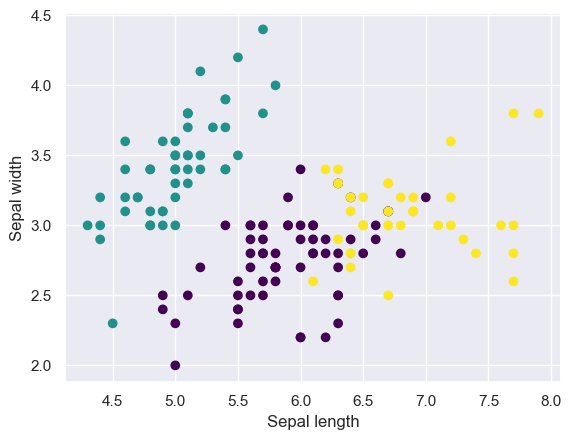

In [86]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X_iris = iris.data  # Feature matrix
y_iris = iris.target  # Target variable (labels)

# Create a KMeans model with n_clusters=3
kmeans = KMeans(n_clusters=3, init = 'k-means++')

# Fit the model to the data
kmeans.fit(X_iris)

# Make predictions
y_pred = kmeans.predict(X_iris)

# Visualize the clusters
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

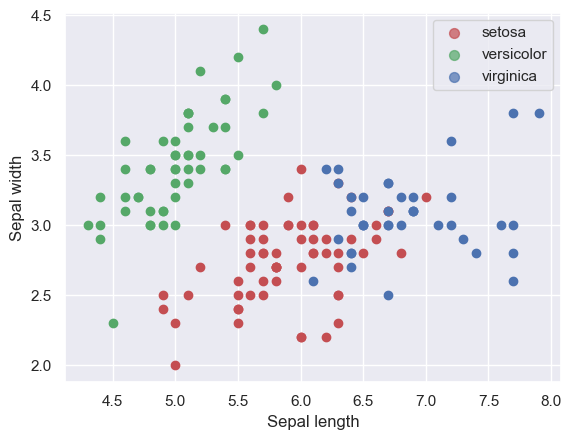

In [94]:
# Visualize the clusters with original labels

from matplotlib.colors import ListedColormap

# Define colors for each label
colors = ['r', 'g', 'b']

# Visualize the clusters with original labels
for i in range(len(X_iris)):
    plt.scatter(X_iris[i, 0], X_iris[i, 1], c=colors[y_pred[i]])

# Add legend for flower type
for i, target_name in enumerate(iris.target_names):
    plt.scatter([], [], c=colors[i], alpha=0.7, s=50, label=target_name)
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


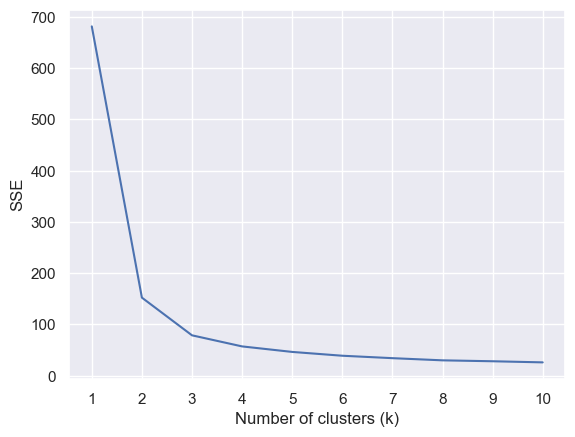

In [96]:
# Calculate within-cluster sum of squared errors for different k values
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_iris)
    sse.append(kmeans.inertia_)

# Plot the SSE for each k value
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()


**Task 3**: 
- Load the wine dataset from scikit-learn and perform hierarchical clustering to group the wines into different clusters based on their features. 
- Experiment with different linkage methods and report the silhouette score. 
- Use dendrogram visualisation to analyze the clustering results.

#### More information on Hierarchical Clustering https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
#### Wine dataset https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

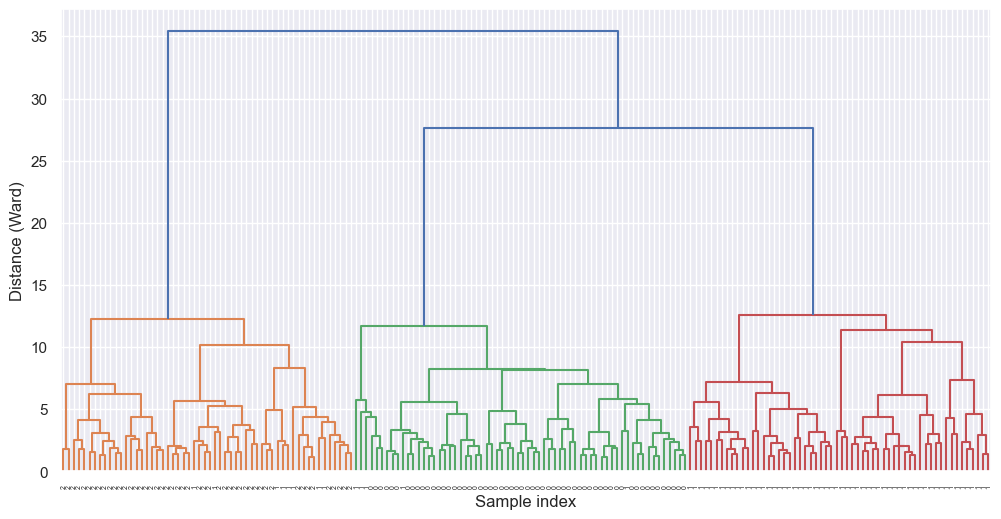

In [97]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the wine dataset PLEASE NOTE THAT THIS IS A CLEAN VERSION OF THE WINE DATASET so in this case no preprocessing is neccessary
wine = load_wine()
X = wine.data  # Feature matrix

# Standardize the features using StandardScaler() to scale the features to zero mean and unit variance.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform hierarchical clustering using linkage() with the "ward" method, which minimizes the variance of the clusters being merged. 
Z = linkage(X_std, 'ward')

# Plot the dendrogram and set the labels to the target variable wine.target. 
# Note that we set the orientation to 'top' and label the x-axis and y-axis using plt.xlabel() and plt.ylabel(). 
# Also we display the dendrogram using plt.show().
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=wine.target, orientation='top')
plt.xlabel('Sample index')
plt.ylabel('Distance (Ward)')
plt.show()

you should see a dendrogram showing the hierarchical clustering of the wine dataset. 
The dendrogram shows the distances between clusters and the labels for each sample in the dataset. 
You can use the dendrogram to identify the number of clusters and which samples belong to each cluster.

In [100]:
# Experiment with different linkage methods

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    # Perform hierarchical clustering
    Z = linkage(X_std, method)
    
    # Calculate the silhouette score
    # fcluster() to assign the labels based on a maximum number of clusters of 5 and using the "maxclust" criterion.
    labels = fcluster(Z, t=5, criterion='maxclust') 
    score = silhouette_score(X_std, labels)
    print(f"Linkage method: {method}, Silhouette score: {score}")

Linkage method: ward, Silhouette score: 0.18674235566758707
Linkage method: complete, Silhouette score: 0.18836501623937577
Linkage method: average, Silhouette score: 0.22945756295901437
Linkage method: single, Silhouette score: 0.14235319849452613


The silhouette score ranges from -1 to 1, where a higher score indicates better clustering.

A silhouette score close to 1 means that the objects in the same cluster are similar to each other and dissimilar to objects in other clusters. This indicates a well-separated and well-defined clustering.

A silhouette score close to 0 means that the clustering may be overlapping and the objects may not be clearly assigned to one cluster or another.

A silhouette score close to -1 means that the objects may have been assigned to the wrong clusters, and the clustering results are likely to be incorrect.

Therefore, we want the silhouette score to be as close to 1 as possible to indicate that the objects are well-clustered and distinct. However, a high silhouette score does not necessarily mean that the clustering is optimal or the best solution for the given dataset, and it should be evaluated in combination with other methods, such as visual inspection of the clusters and domain expertise.

So what does this imply for the Silhouette score values that you obtained?

**Task 4**: 
- Load the diabetes dataset and apply the DBSCAN clustering algorithm to group the data points into different clusters based on their proximity to each other.
- Experiment with different epsilon (eps) and minimum samples (min_samples) values and report the silhouette score. 
- Use a scatter plot to visualise the clustering results for the different values of epsilon and minimum samples.

#### More information on DBSCAN https://scikit-learn.org/stable/modules/clustering.html#dbscan
#### More information on eps and min_samples https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN
#### Diabetes dataset https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [102]:
from sklearn.datasets import load_diabetes
from sklearn.cluster import DBSCAN
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()
X_diab = diabetes.data

# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_diab)

# Print the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 1
Estimated number of noise points: 0


So do you find that estimated number of clusters is 1?  it could indicate that the eps and min_samples parameters are not set appropriately for the given dataset, or that the dataset does not exhibit clear density-based structure.

Now you can try adjusting the values of eps and min_samples to see if it affects the clustering result. 
Increasing the value of eps can lead to more points being grouped into the same cluster, while increasing the value of min_samples can lead to more points being labeled as noise.

How about trying different clustering algorithms like K-means or hierarchical clustering, or exploring other dimensionality reduction techniques or feature engineering methods to better reveal the underlying structure of the data?

In [104]:
# Try different values of eps and min_samples
best_score = -1
for eps in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for min_samples in [2, 3, 4, 5]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_diab)
        if len(set(clusters)) > 1:
            score = silhouette_score(X_diab, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print("Best silhouette score: {:.2f}".format(best_score))
print("Best eps value: {:.2f}".format(best_eps))
print("Best min_samples value: {}".format(best_min_samples))

Best silhouette score: 0.13
Best eps value: 0.10
Best min_samples value: 3


Do keep in mind that the optimal values of eps and min_samples may depend on the specific goals of the analysis.
So different parameter values may lead to different clustering results.
As such you should always try to visually inspect the resulting clusters and evaluate their quality using other metrics besides the silhouette score.

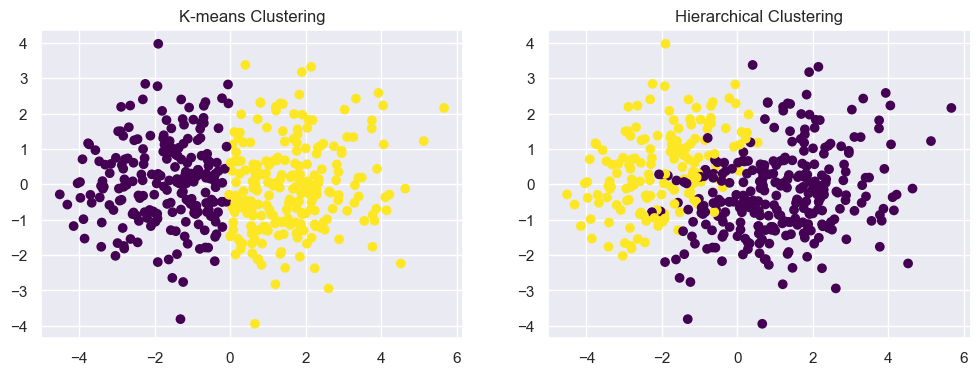

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
diabetes = load_diabetes()

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(diabetes.data)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Define the clustering algorithms
# Try using different numbers of clusters and see what happens
kmeans = KMeans(n_clusters=2, random_state=42)  
hierarchical = AgglomerativeClustering(n_clusters=2)

# Fit the clustering algorithms to the data
kmeans_labels = kmeans.fit_predict(X_pca)
hierarchical_labels = hierarchical.fit_predict(X_pca)

# Visualize the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.show()


**Task 5**: 
- Load the Wisconsin breast cancer dataset and apply the K-means clustering algorithm 
- Experiment with different numbers of cluster and report the silhouette score. 
- Use a scatter plot to visualise the clustering results for the different numbers of clusters, what do can you say about the dataset/features compared with the previous task. 
- Try using PCA and then compare again. Also try Heirarchical Clustering. 

#### Wisconsin Breast Cancer Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

For 2 clusters, silhouette score is 0.70
For 3 clusters, silhouette score is 0.67
For 4 clusters, silhouette score is 0.53
For 5 clusters, silhouette score is 0.51
For 6 clusters, silhouette score is 0.49
For 7 clusters, silhouette score is 0.47
For 8 clusters, silhouette score is 0.47
For 9 clusters, silhouette score is 0.47
For 10 clusters, silhouette score is 0.47


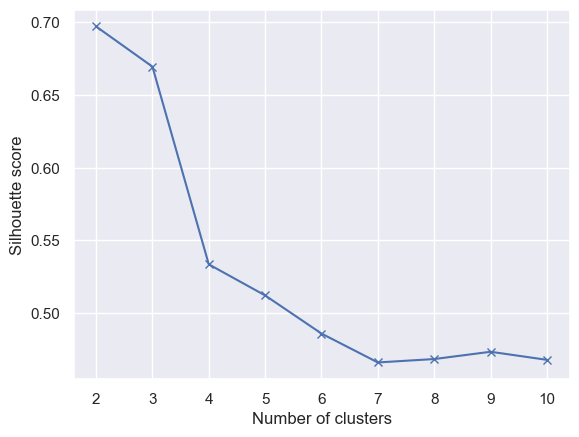

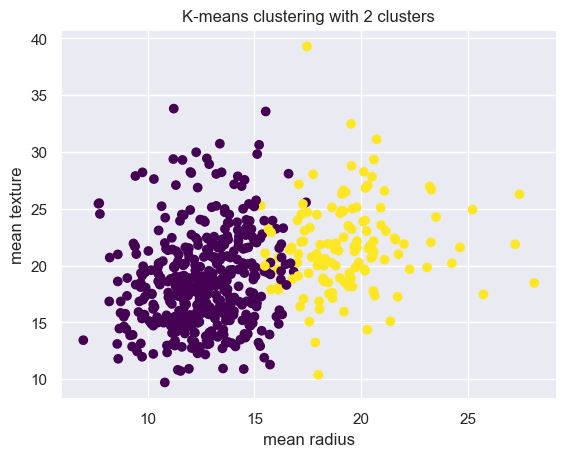

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()  #Note that this is a clean version of the dataset
X = data.data

# Experiment with different numbers of clusters and report the silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"For {k} clusters, silhouette score is {score:.2f}")

# Plot the silhouette scores for different numbers of clusters
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Visualise the clustering results for the optimal number of clusters
k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f"K-means clustering with {k} clusters")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

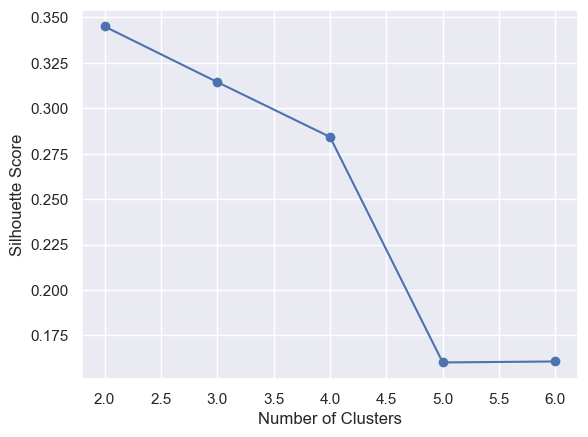

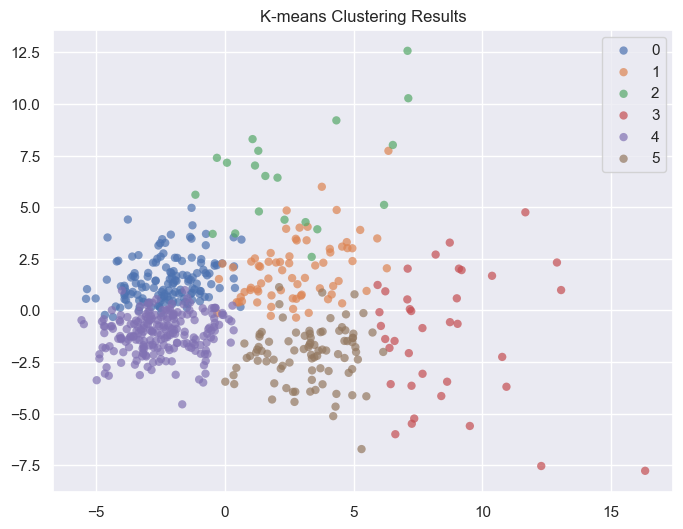

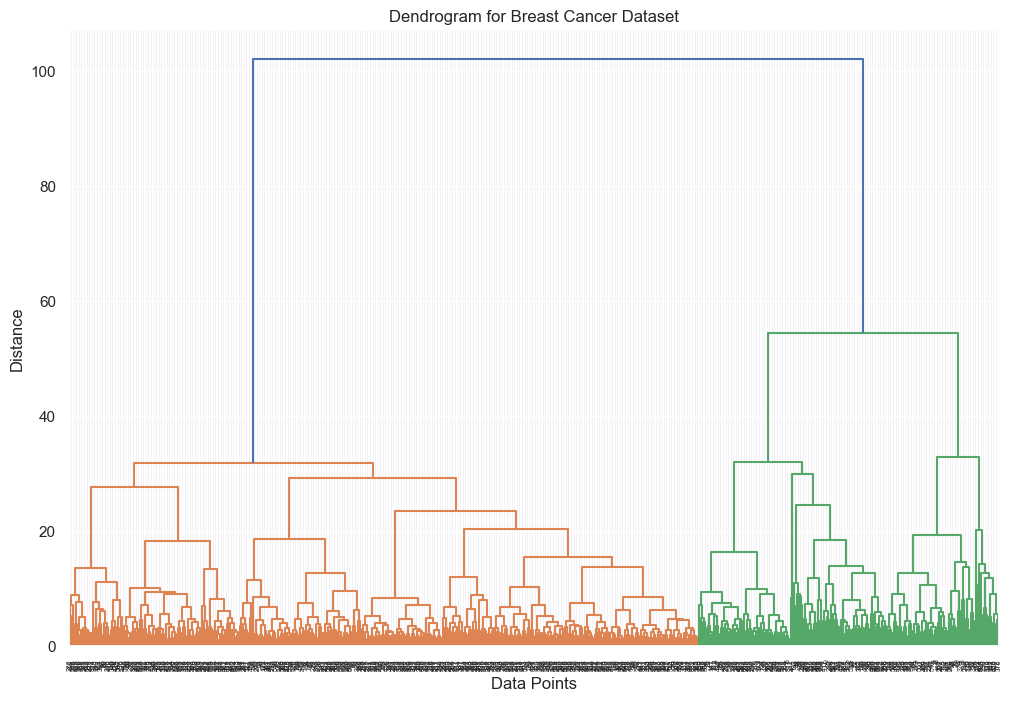

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Load Wisconsin breast cancer dataset
cancer = load_breast_cancer()

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(cancer.data)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Apply K-means clustering
n_clusters = [2, 3, 4, 5, 6]
sil_scores = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_std)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(X_std, labels))

# Visualize silhouette scores
plt.plot(n_clusters, sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Visualize clustering results using scatter plot
plt.figure(figsize=(8,6))
for i, label in enumerate(np.unique(kmeans.labels_)):
    plt.scatter(X_pca[kmeans.labels_ == label, 0], X_pca[kmeans.labels_ == label, 1], label=label, alpha=0.7, edgecolors='none')
plt.legend()
plt.title('K-means Clustering Results')
plt.show()

# Perform hierarchical clustering
Z = linkage(X_std, method='ward')
plt.figure(figsize=(12, 8))
_ = dendrogram(Z)
plt.title('Dendrogram for Breast Cancer Dataset')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Best number of clusters: 2


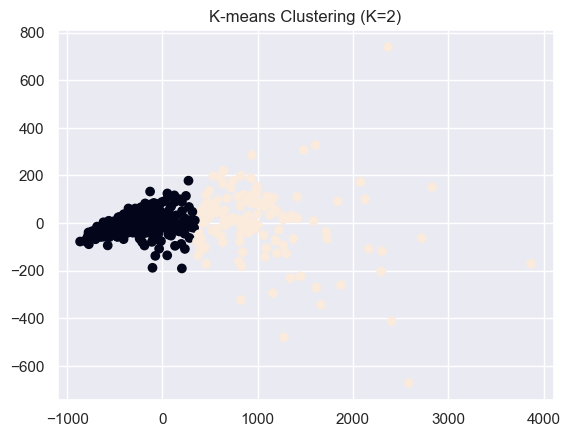

In [115]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer().data

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Try K-means clustering with different numbers of clusters
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    silhouette_scores.append(score)

# Find the best number of clusters based on silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters: {best_k}")

# Fit K-means clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(pca_data)

# Plot the scatter plot for the K-means with the best silhouette score
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.title(f"K-means Clustering (K={best_k})")
plt.show()
